#Notebook Prueba con LSTM

In [50]:
import numpy as np
import pandas as pd

#Importando data

In [438]:
!pip install -U keras-tuner

     |████████████████████████████████| 71kB 5.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=0336a72c4c73d71e55948943c93fd3a3cb230ce0573bfe3b33820d3a567bbe11
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=5b920e942ed76890605d795ac9fc89cfdf1025f0123503a18982b0b1084fad73
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [154]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1D3hyPdj4yzJPgqf-2N6GStx2KJnbcqvk
!gdown https://drive.google.com/uc?id=10kl3EyVkIM1GEjzHR_3DRwruQddVNaqH

Downloading...
From: https://drive.google.com/uc?id=1D3hyPdj4yzJPgqf-2N6GStx2KJnbcqvk
To: /content/Train_base_with_missing_data.csv
139MB [00:00, 194MB/s]
Downloading...
From: https://drive.google.com/uc?id=10kl3EyVkIM1GEjzHR_3DRwruQddVNaqH
To: /content/Train_base.txt
139MB [00:01, 100MB/s] 


Dataset testing

In [52]:
!gdown https://drive.google.com/uc?id=1Febz_GR_F9FbE7Bw1aaUeEY-zAfLFeUa

Downloading...
From: https://drive.google.com/uc?id=1Febz_GR_F9FbE7Bw1aaUeEY-zAfLFeUa
To: /content/Test_base.txt
6.02MB [00:00, 94.3MB/s]


In [200]:
df= pd.read_csv('./Train_base.txt',
                infer_datetime_format=True,
                parse_dates={'Fecha_Registro':[1,2]}, index_col=['Fecha_Registro'])

In [460]:
df = pd.read_csv('./Train_base_with_missing_data.csv',
                infer_datetime_format=True,
                  parse_dates=['Fecha_Registro'],
                index_col=['Fecha_Registro'])
df = df.sort_index()


In [198]:
seasonByMonth =  [month%12 // 3 + 1 for month in range(1, 13)]
def isSeasonY(month, seasonIx):
  season = seasonByMonth[int(month) - 1]
  return int(season == seasonIx)

# Probando con LSTM

In [461]:
del df['ID_Registro']

In [462]:
df = df[['Consumo_Energia_Global_kw', 'Consumo_Energia_Reactiva_kw', 'Voltaje_vol',
       'Intensidad_global_ampere', 'Consumo_Energia_Area_2_calidad_watt_hora', 'Consumo_Energia_Area_1_administrativo_watt_hora','Consumo_Energia_Area_3_productivo_watt_hora',
       ]]

In [463]:
df_values =df.values

In [464]:
df['Potencia-cosphi'] = ((np.sqrt(1 - np.square((df_values[:,1]*1000) / (df_values[:,2] * df_values[:,3]))))*df_values[:,2]*df_values[:,3])/1000

In [465]:
df_values =df.values
df['Consumo_Energia_Restante'] = (df_values[:,1] * 1000 / 60) - (df_values[:,4] + df_values[:,5] + df_values[:,6])

#d = pd.Series(df.index, index=df.index)
#df['Dia_Semana'] = d.dt.dayofweek
#df['Hora'] = d.dt.hour
#df['Minuto'] = d.dt.minute
#df['Dia'] = d.dt.day
#df['Semana'] = d.dt.week
#df['Mes'] = d.dt.month
#df['Anio'] = d.dt.year
#df['Es_FDS'] = df['Dia_Semana'].map(lambda x : 1 if x > 4 else 0)
#df['Es_DDS'] = df['Dia_Semana'].map(lambda x : 1 if x < 4 else 0)
#df['Es_HoraLaborable'] =  df.apply(lambda x : 1 if 9 <= x.Hora <= 16  and  0 <= x.Dia_Semana <=  4 else 0 , axis=1)
#df['Es_HoraNoLaborable'] = df.apply(lambda x : 1 if ((not  9 <= x.Hora <= 16 and  0 <=  x.Dia_Semana <=  4) or  (5 <=  x.Dia_Semana <=  6)) else 0 , axis=1)
#df['Es_Dia'] = df['Hora'].map(lambda x : 1 if  6 <= x <= 11 else 0)
#df['Es_Tarde'] = df['Hora'].map(lambda x : 1 if  12 <= x <= 18 else 0)
#df['Es_Noche'] = df['Hora'].map(lambda x : 1 if  19 <= x <= 23 else 0)
#df['Es_Madrugada'] = df['Hora'].map(lambda x : 1 if  0 <= x <= 5 else 0)
#df['Es_Invierno'] = df['Mes'].map(lambda x : isSeasonY(x,1)) 
#df['Es_Primavera'] = df['Mes'].map(lambda x : isSeasonY(x,2))
#df['Es_Verano'] = df['Mes'].map(lambda x : isSeasonY(x,3))
#df['Es_Otoño'] = df['Mes'].map(lambda x : isSeasonY(x,4))


Resampling

Se uso resampling por hora para una evaluación rápida del modelo

In [466]:
#df_resample = df.resample('h').mean() 
df_resample = df

In [282]:
df_resample

,Consumo_Energia_Global_kw,Consumo_Energia_Reactiva_kw,Intensidad_global_ampere,Consumo_Energia_Area_2_calidad_watt_hora,Consumo_Energia_Area_1_administrativo_watt_hora,Consumo_Energia_Area_3_productivo_watt_hora,Potencia-cosphi
Fecha_Registro,,,,,,,
2015-12-16 17:24:00,4.216,0.418,18.4,1.0,0.0,17.0,4.300791
2015-12-16 17:25:00,5.360,0.436,23.0,1.0,0.0,16.0,5.355772
2015-12-16 17:26:00,5.374,0.498,23.0,2.0,0.0,17.0,5.342510
2015-12-16 17:27:00,5.388,0.502,23.0,1.0,0.0,17.0,5.352531
2015-12-16 17:28:00,3.666,0.528,15.8,1.0,0.0,17.0,3.686121
...,...,...,...,...,...,...,...
2019-09-18 10:19:00,0.582,0.248,2.6,2.0,0.0,0.0,0.571326
2019-09-18 10:20:00,0.576,0.248,2.6,1.0,0.0,1.0,0.570844
2019-09-18 10:21:00,0.576,0.248,2.6,1.0,0.0,1.0,0.571439


In [467]:
del df_resample['Voltaje_vol']

Training set de 800000 registros

In [213]:
df_resample

,Consumo_Energia_Global_kw,Consumo_Energia_Reactiva_kw,Voltaje_vol,Intensidad_global_ampere,Consumo_Energia_Area_2_calidad_watt_hora,Consumo_Energia_Area_1_administrativo_watt_hora,Consumo_Energia_Area_3_productivo_watt_hora
Fecha_Registro,,,,,,,
2015-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.527778,0.0,16.861111
2015-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,6.716667,0.0,16.866667
2015-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,1.433333,0.0,16.683333
2015-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.000000,0.0,16.783333
2015-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.416667,0.0,17.216667
...,...,...,...,...,...,...,...
2019-09-18 06:00:00,0.610867,0.086400,241.245833,2.566667,0.000000,0.0,6.350000
2019-09-18 07:00:00,1.804000,0.070933,240.184500,7.520000,0.000000,0.0,19.300000
2019-09-18 08:00:00,1.378600,0.124500,239.872333,5.703333,0.550000,0.0,19.150000


In [215]:
test[:, 1:].shape

(12555, 8)

In [221]:
scaled.shape, reframed.shape

((32922, 7), (32555, 9))

In [494]:
from sklearn.preprocessing import MinMaxScaler

values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
print(values.shape)
scaled = scaler.fit_transform(values)
#reframed = series_to_supervised(scaled, 1, 1)
#r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
#reframed.drop(reframed.columns[r], axis=1, inplace=True)

values = scaled#reframed.values
n_train_time = 1600000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, 1:], train[:, 0]
test_x, test_y = test[:, 1:], test[:, 0]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))



(1976700, 8)


In [227]:
pd.DataFrame(train)

,0,1,2,3,4,5,6
0,0.636816,0.295738,0.337945,0.631157,0.011366,0.000000,0.808686
1,0.545045,0.103358,0.335501,0.541487,0.144652,0.000000,0.808953
2,0.509006,0.110073,0.283802,0.502152,0.030869,0.000000,0.800160
3,0.488550,0.096987,0.315987,0.481110,0.000000,0.000000,0.804956
4,0.455597,0.099010,0.434417,0.449904,0.008973,0.000000,0.825739
...,...,...,...,...,...,...,...
19995,0.326801,0.441972,0.660618,0.316356,0.010768,0.000000,0.167066
19996,0.214127,0.114938,0.584956,0.205285,0.000000,0.000000,0.000000
19997,0.351380,0.116487,0.587961,0.336203,0.011486,0.000000,0.000000
19998,0.444629,0.140551,0.645894,0.423840,0.000000,0.150930,0.626699


<h3> Ajustando modelo <h3>

In [66]:
#model.add(LSTM(200, return_sequences=False))
#model.add(Dropout(0.2))

In [470]:
from keras.layers import LSTM
from keras.layers import Dropout
from kerastuner.tuners import RandomSearch,BayesianOptimization
from tensorflow import keras
from tensorflow.keras import layers
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units',min_value=32,
                                    max_value=512,
                                    step=32), 
            input_shape=(train_x.shape[1], train_x.shape[2]))) #   activation='relu',
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam( #loss='mse', metrics=['mse']
        hp.Choice('learning_rate',
                  values=[1e-2, 1e-3, 1e-4])))
    return model

In [492]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=2,
    directory='lstm_test',
    project_name='lstmtest')

In [495]:
tuner.search(train_x, train_y,
             epochs=10,
             batch_size=100,
             validation_data=(test_x, test_y))

Trial 6 Complete [00h 17m 44s]
val_loss: 1.0158630175283179e-05

Best val_loss So Far: 9.387528280058177e-06
Total elapsed time: 01h 29m 56s
INFO:tensorflow:Oracle triggered exit


In [452]:
modelr = tuner.get_best_models(num_models=1)

In [454]:
modelr[0]

In [491]:
!rm -r untitled_project lstm_test

In [483]:
tuner_bo = BayesianOptimization(
            build_model,
            objective='val_loss', #mse
            max_trials=5,
            seed=42,
            executions_per_trial=2
        )
tuner_bo.search(train_x, train_y,
             epochs=10,
             batch_size=100,
             validation_data=(test_x, test_y))

Trial 5 Complete [00h 17m 05s]
val_loss: 1.128320764109958e-05

Best val_loss So Far: 9.545733973936876e-06
Total elapsed time: 01h 39m 45s
INFO:tensorflow:Oracle triggered exit


In [484]:
tuner_bo.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 224
learning_rate: 0.001
Score: 9.545733973936876e-06
Trial summary
Hyperparameters:
units: 480
learning_rate: 0.01
Score: 9.697728273749817e-06
Trial summary
Hyperparameters:
units: 352
learning_rate: 0.01
Score: 1.0048436251963722e-05
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.0001
Score: 1.128320764109958e-05
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.0001
Score: 1.1323224498482887e-05


In [485]:
model_bo = tuner_bo.get_best_models(num_models=2)[0]

In [489]:
model_bo.save('bo_lstm_full.h5')

In [459]:
model_rs = tuner.get_best_models(num_models=2)[0]
model_rs.save('rs_lstm.h5')

Epoch 1/10
286/286 - 3s - loss: 0.0020 - val_loss: 1.0333e-05
Epoch 2/10
286/286 - 1s - loss: 1.1857e-04 - val_loss: 1.4605e-05
Epoch 3/10
286/286 - 1s - loss: 9.4251e-05 - val_loss: 2.0328e-05
Epoch 4/10
286/286 - 1s - loss: 8.6972e-05 - val_loss: 1.9566e-05
Epoch 5/10
286/286 - 1s - loss: 7.7511e-05 - val_loss: 9.1960e-06
Epoch 6/10
286/286 - 1s - loss: 7.3478e-05 - val_loss: 2.2926e-05
Epoch 7/10
286/286 - 1s - loss: 7.1299e-05 - val_loss: 2.8503e-05
Epoch 8/10
286/286 - 1s - loss: 7.7075e-05 - val_loss: 2.8760e-05
Epoch 9/10
286/286 - 1s - loss: 7.3176e-05 - val_loss: 1.0176e-05
Epoch 10/10
286/286 - 1s - loss: 6.4234e-05 - val_loss: 1.1027e-05
dict_keys(['loss', 'val_loss'])


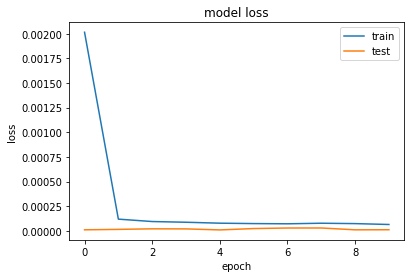

Test RMSE: 0.021


In [435]:
iG2L6K8I6f
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np
from keras import optimizers
from keras.optimizers import Adam



model = Sequential()
model.add(LSTM(64, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
myadam = Adam(learning_rate=0.01) 
model.compile(loss='mean_squared_error', optimizer=myadam)

# Network fitting
#history = model.fit(train_x, train_y, epochs=10, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)
history = model.fit(train_x, train_y, epochs=10, batch_size=70,  validation_data=(test_x, test_y), verbose=2, shuffle=False)

print(history.history.keys())
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df_resample.shape[1]  -1
# Prediction test
yhat = model_bo.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, -size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, -size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


In [486]:

size = df_resample.shape[1]  -1
# Prediction test
yhat = model_bo.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, -size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, -size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.034


In [212]:
test_x.shape

(12555, 1, 8)

In [206]:
test_x.reshape((test_x.shape[0], size))

ValueError: ignored

Predicción

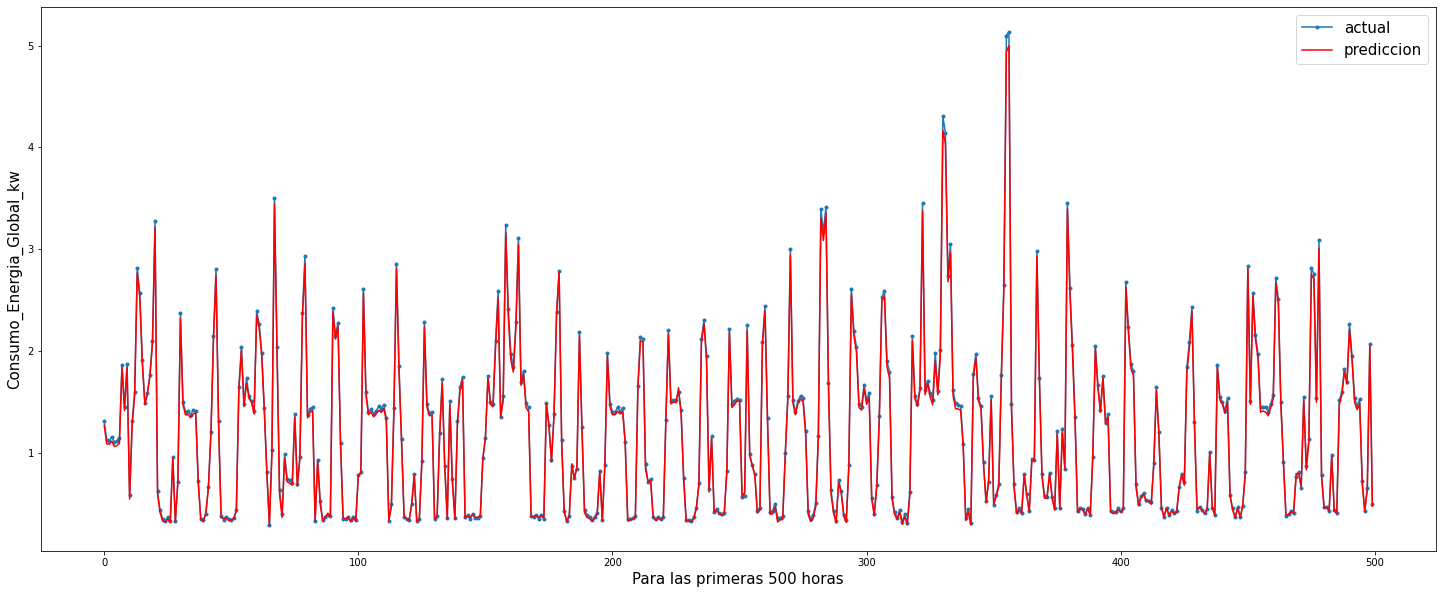

In [241]:
aa=[x for x in range(500)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediccion")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Para las primeras 500 horas', size=15)
plt.legend(fontsize=15)
plt.show()

Probando con test dataset

In [487]:
dfx= pd.read_csv('./Test_base.txt',
                infer_datetime_format=True,
                parse_dates={'Fecha_Registro':[1,2]}, index_col=['Fecha_Registro'])
del dfx['ID_Registro']
df2= pd.read_csv('./Test_base.txt',
                infer_datetime_format=True,
                parse_dates={'Fecha_Registro':[1,2]}, index_col=['Fecha_Registro'])

In [336]:
dfx = dfx[[ 'Consumo_Energia_Reactiva_kw', 'Voltaje_vol',
       'Intensidad_global_ampere', 'Consumo_Energia_Area_2_calidad_watt_hora', 'Consumo_Energia_Area_1_administrativo_watt_hora','Consumo_Energia_Area_3_productivo_watt_hora',
       ]]

In [337]:
values2 = dfx.values
dfx['Potencia-cosphi'] = ((np.sqrt(1 - np.square((values2[:,0]*1000) / (values2[:,1] * values2[:,2]))))*values2[:,1]*values2[:,2])/1000
del dfx['Voltaje_vol']



In [272]:
dfx

,Consumo_Energia_Reactiva_kw,Intensidad_global_ampere,Consumo_Energia_Area_1_administrativo_watt_hora,Consumo_Energia_Area_2_calidad_watt_hora,Consumo_Energia_Area_3_productivo_watt_hora,Potencia-cosphi
Fecha_Registro,,,,,,
2019-09-18 10:23:00,0.248,2.6,0.0,1.0,1.0,0.570674
2019-09-18 10:24:00,0.248,2.6,0.0,1.0,1.0,0.570957
2019-09-18 10:25:00,0.226,2.4,0.0,1.0,0.0,0.531194
2019-09-18 10:26:00,0.150,2.2,0.0,1.0,1.0,0.507966
2019-09-18 10:27:00,0.152,2.2,0.0,2.0,0.0,0.507692
...,...,...,...,...,...,...
2019-11-26 20:58:00,0.000,4.0,0.0,0.0,0.0,0.961720
2019-11-26 20:59:00,0.000,4.0,0.0,0.0,0.0,0.960000
2019-11-26 21:00:00,0.000,3.8,0.0,0.0,0.0,0.911316


In [313]:
values2.shape

(94762, 6)

In [340]:
values2 = dfx.values
zeros = np.zeros((values2.shape[0],1))
values2 = np.concatenate((zeros, values2[:,:]), axis=1)
#scaler2 = MinMaxScaler(feature_range=(0, 1))
scaled2 = scaler.transform(values2)
values2 = scaled2
test_x2 = values2[:, 1:]
test_x2 = test_x2.reshape((test_x2.shape[0], 1, test_x2.shape[1]))
test_x2.shape, values2.max(),values.max()


((94762, 1, 6), 1.0, 1.0000000000000002)

In [338]:
df_resample.columns

Index(['Consumo_Energia_Global_kw', 'Consumo_Energia_Reactiva_kw',
       'Intensidad_global_ampere', 'Consumo_Energia_Area_2_calidad_watt_hora',
       'Consumo_Energia_Area_1_administrativo_watt_hora',
       'Consumo_Energia_Area_3_productivo_watt_hora', 'Potencia-cosphi'],
      dtype='object')

In [339]:
dfx.columns

Index(['Consumo_Energia_Reactiva_kw', 'Intensidad_global_ampere',
       'Consumo_Energia_Area_2_calidad_watt_hora',
       'Consumo_Energia_Area_1_administrativo_watt_hora',
       'Consumo_Energia_Area_3_productivo_watt_hora', 'Potencia-cosphi'],
      dtype='object')

In [329]:
scaled2 = scaler.transform(values2)
pd.DataFrame(scaled)

,0,1,2,3,4,5,6
0,0.374796,0.300719,0.377593,0.0125,0.0,0.548387,0.384171
1,0.478363,0.313669,0.473029,0.0125,0.0,0.516129,0.479445
2,0.479631,0.358273,0.473029,0.0250,0.0,0.548387,0.478247
3,0.480898,0.361151,0.473029,0.0125,0.0,0.548387,0.479152
4,0.325005,0.379856,0.323651,0.0125,0.0,0.548387,0.328661
...,...,...,...,...,...,...,...
1976695,0.045808,0.178417,0.049793,0.0250,0.0,0.000000,0.047370
1976696,0.045265,0.178417,0.049793,0.0125,0.0,0.032258,0.047327
1976697,0.045265,0.178417,0.049793,0.0125,0.0,0.032258,0.047381
1976698,0.045084,0.179856,0.049793,0.0125,0.0,0.000000,0.047320


#Predicción de dataset

In [304]:
dfx

,Consumo_Energia_Reactiva_kw,Intensidad_global_ampere,Consumo_Energia_Area_1_administrativo_watt_hora,Consumo_Energia_Area_2_calidad_watt_hora,Consumo_Energia_Area_3_productivo_watt_hora,Potencia-cosphi
Fecha_Registro,,,,,,
2019-09-18 10:23:00,0.248,2.6,0.0,1.0,1.0,0.570674
2019-09-18 10:24:00,0.248,2.6,0.0,1.0,1.0,0.570957
2019-09-18 10:25:00,0.226,2.4,0.0,1.0,0.0,0.531194
2019-09-18 10:26:00,0.150,2.2,0.0,1.0,1.0,0.507966
2019-09-18 10:27:00,0.152,2.2,0.0,2.0,0.0,0.507692
...,...,...,...,...,...,...
2019-11-26 20:58:00,0.000,4.0,0.0,0.0,0.0,0.961720
2019-11-26 20:59:00,0.000,4.0,0.0,0.0,0.0,0.960000
2019-11-26 21:00:00,0.000,3.8,0.0,0.0,0.0,0.911316


In [302]:
inv_yhat2.shape

(94762, 6)

In [342]:
size2 = dfx.shape[1]
yhat2 = model.predict(test_x2)
test_x2 = test_x2.reshape((test_x2.shape[0], size2))
# invert scaling for prediction#
inv_yhat2 = np.concatenate((yhat2, test_x2[:,:]), axis=1)
inv_yhat2_b = scaler.inverse_transform(inv_yhat2)
inv_yhat2_b.shape

(94762, 7)

In [316]:
yhat.max()

0.842521

In [343]:
yhat2.max()

0.9574909

In [319]:
scaled2.max(), scaled.max()

(5.255809128630706, 1.0000000000000002)

In [344]:
predicciones = inv_yhat2_b[:, 0]
predicciones.max()

10.65244471359253

Predicciones a csv

In [345]:
df_prediccion = pd.DataFrame(predicciones)


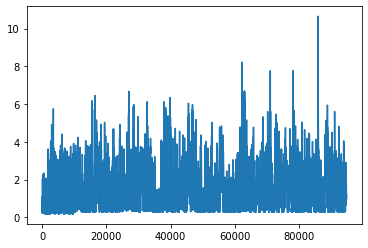

In [346]:
df_prediccion[0].plot()

In [347]:
df_final = pd.DataFrame()

In [348]:
df_final['ID_Registro'] = df2['ID_Registro'] 
df_final['Consumo_Energia_Global_kw'] = predicciones

In [349]:
df_final

,ID_Registro,Consumo_Energia_Global_kw
Fecha_Registro,,
2019-09-18 10:23:00,1975259,0.600082
2019-09-18 10:24:00,1975260,0.600237
2019-09-18 10:25:00,1975261,0.574742
2019-09-18 10:26:00,1975262,0.525391
2019-09-18 10:27:00,1975263,0.544483
...,...,...
2019-11-26 20:58:00,2075254,1.016904
2019-11-26 20:59:00,2075255,1.016031
2019-11-26 21:00:00,2075256,0.970250


In [350]:
df_final.to_csv('predicciones.csv',index=False)